In [20]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
from sklearn.mixture import GaussianMixture as mix
from sklearn.cluster import KMeans as KM
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as RF
warnings.filterwarnings('ignore')
df = pd.read_csv("/Users/mkr4014/Desktop/CTAP/ctap.csv")

In [21]:
def scaled(df,df1):
    X = df1.values
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(df.values)
    df_scaled = pd.DataFrame(data=X_scaled,columns = df.columns, index = df.index)
    return df_scaled

In [22]:
def plotcurve_gm(df):
    n_components = np.arange(1, 21)
    models = [mix(n, random_state=0).fit(df) for n in n_components]
    plt.plot(n_components, [m.bic(df) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(df) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components');

In [23]:
def plotcurve_KM(df):
    n_components = np.arange(1, 21)
    models = [KM(n, random_state=0).fit(df) for n in n_components]
    plt.plot(n_components, [-m.score(df) for m in models], label='score')
    plt.legend(loc='best')
    plt.xlabel('n_components');

In [24]:
def predict(scaled = None, model = 'GMM'):
    df_1.drop(columns=['cluster_1'],errors='ignore',inplace=True)
    df_2.drop(columns=['cluster_2'],errors='ignore',inplace=True)
    df_3.drop(columns=['cluster_3'],errors='ignore',inplace=True)
    df_4.drop(columns=['cluster_4'],errors='ignore',inplace=True)
    df_5.drop(columns=['cluster_5'],errors='ignore',inplace=True)
    df_6.drop(columns=['cluster_6'],errors='ignore',inplace=True)
    if scaled:
        df1 = df_1_scaled
        df2 = df_2_scaled
        df3 = df_3_scaled
        df4 = df_4_scaled
        df5 = df_5_scaled
        df6 = df_6_scaled
        if model=='KM':
            m = model_KM_scaled
        else:
            m = model_gm_scaled
    else:
        df1 = df_1
        df2 = df_2
        df3 = df_3
        df4 = df_4
        df5 = df_5
        df6 = df_6
        if model=='KM':
            m = model_KM
        else:
            m = model_gm
    labels_1 = m.predict(df1)
    labels_2 = m.predict(df2)
    labels_3 = m.predict(df3)
    labels_4 = m.predict(df4)
    labels_5 = m.predict(df5)
    labels_6 = m.predict(df6)
    df_1['cluster_1'] = labels_1
    df_2['cluster_2'] = labels_2
    df_3['cluster_3'] = labels_3
    df_4['cluster_4'] = labels_4
    df_5['cluster_5'] = labels_5
    df_6['cluster_6'] = labels_6

In [25]:
def plot_clusters():
    plt.figure(figsize=(16, 8))
    plt.subplot(2,3,1)
    plt.scatter(df_1['mean'].values, df_1['std'].values, c=df_1['cluster_1'].values, s=40, cmap='jet');
    plt.title('First period')
    plt.subplot(2,3,2)
    plt.scatter(df_2['mean'].values, df_2['std'].values, c=df_2['cluster_2'].values, s=40, cmap='jet');
    plt.title('Second period')
    plt.subplot(2,3,3)
    plt.scatter(df_3['mean'].values, df_3['std'].values, c=df_3['cluster_3'].values, s=40, cmap='jet');
    plt.title('Third period')
    plt.subplot(2,3,4)
    plt.scatter(df_4['mean'].values, df_4['std'].values, c=df_4['cluster_4'].values, s=40, cmap='jet');
    plt.title('Fourth period')
    plt.subplot(2,3,5)
    plt.scatter(df_5['mean'].values, df_5['std'].values, c=df_5['cluster_5'].values, s=40, cmap='jet');
    plt.title('Fifth period')
    plt.subplot(2,3,6)
    plt.scatter(df_6['mean'].values, df_6['std'].values, c=df_6['cluster_6'].values, s=40, cmap='jet');
    plt.title('Sixth period')

In [26]:
def plot_heatmap():
    df_1_dropped = df_1.drop(columns = ['mean','std'])
    df_2_dropped = df_2.drop(columns = ['mean','std'])
    df_3_dropped = df_3.drop(columns = ['mean','std'])
    df_4_dropped = df_4.drop(columns = ['mean','std'])
    df_5_dropped = df_5.drop(columns = ['mean','std'])
    df_6_dropped = df_6.drop(columns = ['mean','std'])
    df_final = df_1_dropped.join(df_2_dropped).join(df_3_dropped).join(df_4_dropped).join(df_5_dropped).join(df_6_dropped)
    df_final_sampled = df_final.sample(100).sort_values(by = ['cluster_1'])
    plt.figure(figsize = (16,10))
    sns.heatmap(df_final_sampled,cmap='jet',yticklabels=False)

In [129]:
def calc_probabilities(df_list):
    n = len(df_list)
    clusters = len(df_list[0].iloc[:,-1].unique())
    prob = np.zeros([clusters,clusters])
    denom = np.zeros(clusters)
    for i in range(n-1):
        df1 = pd.DataFrame(df_list[i].iloc[:,-1])
        df2 = pd.DataFrame(df_list[i+1].iloc[:,-1])
        for j in range(clusters):
            df3 = df1[df1.iloc[:,0]==j]
            denom[j] += len(df3)
            df4 = df3.join(df2,how='inner')
            for k in range(clusters):
                l = len(df4[df4.iloc[:,-1]==k])
                prob[j,k] += l
    for i in range(clusters):
        prob[i]=prob[i]/denom[i]
    return prob

In [27]:
df = df.drop(columns = ['Unnamed: 0','LINE','FLO_LEAK_PHILLIPS','FLO_LEAK_RES_MED','FLO_LEAK_OTHER','RES_MED_PRES','PHILIPS_PRES','RECORDED_TIME','CONTACT_DATE'])

In [28]:
df_30 = df[df['DAYS_ON']<=30]
df_60 = df[(df['DAYS_ON']>30) & (df['DAYS_ON']<=60)]
df_90 = df[(df['DAYS_ON']>60) & (df['DAYS_ON']<=90)]
df_120 = df[(df['DAYS_ON']>90) & (df['DAYS_ON']<=120)]
df_150 = df[(df['DAYS_ON']>120) & (df['DAYS_ON']<=150)]
df_180 = df[(df['DAYS_ON']>150) & (df['DAYS_ON']<=180)]

In [29]:
df_tot = df.groupby('MRN').agg({'FLO_FACE_TIME_VALUE': ['mean', 'std']})['FLO_FACE_TIME_VALUE']
df_1 = df_30.groupby('MRN').agg({'FLO_FACE_TIME_VALUE': ['mean', 'std']})['FLO_FACE_TIME_VALUE']
df_2 = df_60.groupby('MRN').agg({'FLO_FACE_TIME_VALUE': ['mean', 'std']})['FLO_FACE_TIME_VALUE']
df_3 = df_90.groupby('MRN').agg({'FLO_FACE_TIME_VALUE': ['mean', 'std']})['FLO_FACE_TIME_VALUE']
df_4 = df_120.groupby('MRN').agg({'FLO_FACE_TIME_VALUE': ['mean', 'std']})['FLO_FACE_TIME_VALUE']
df_5 = df_150.groupby('MRN').agg({'FLO_FACE_TIME_VALUE': ['mean', 'std']})['FLO_FACE_TIME_VALUE']
df_6 = df_180.groupby('MRN').agg({'FLO_FACE_TIME_VALUE': ['mean', 'std']})['FLO_FACE_TIME_VALUE']

In [30]:
df_tot_scaled = scaled(df_tot,df_tot)
df_1_scaled = scaled(df_1,df_tot)
df_2_scaled = scaled(df_2,df_tot)
df_3_scaled = scaled(df_3,df_tot)
df_4_scaled = scaled(df_4,df_tot)
df_5_scaled = scaled(df_5,df_tot)
df_6_scaled = scaled(df_6,df_tot)

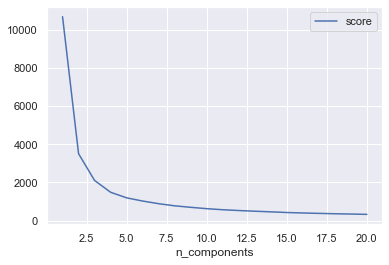

In [31]:
plotcurve_KM(df_tot)

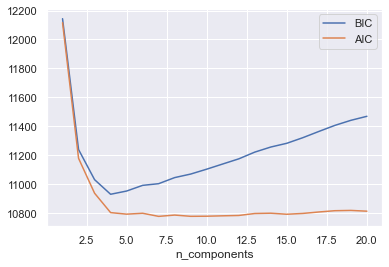

In [32]:
plotcurve_gm(df_tot)

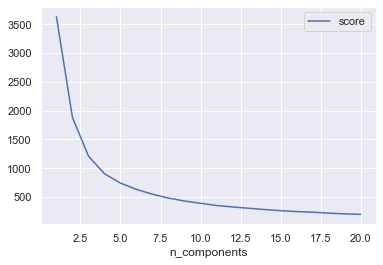

In [33]:
plotcurve_KM(df_tot_scaled)

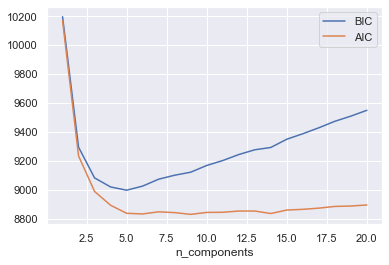

In [34]:
plotcurve_gm(df_tot_scaled)

In [35]:
n_comp_final = 4
model_gm = mix(n_comp_final, random_state=0).fit(df_tot)
labels = model_gm.predict(df_tot)
df_tot['labels'] = labels

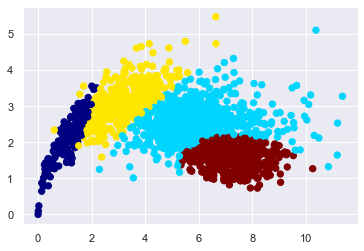

In [36]:
plt.scatter(df_tot['mean'].values, df_tot['std'].values, c=df_tot['labels'].values, s=40, cmap='jet');

In [37]:
df_tot = df_tot.drop(columns=['labels'])

In [38]:
n_comp_final = 4
model_KM = KM(n_comp_final, random_state=0).fit(df_tot)
labels_KM = model_KM.predict(df_tot)
df_tot['labels'] = labels_KM

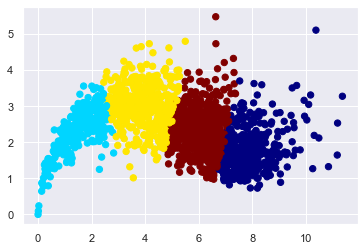

In [39]:
plt.scatter(df_tot['mean'].values, df_tot['std'].values, c=df_tot['labels'].values, s=40, cmap='jet');

In [40]:
df_tot = df_tot.drop(columns=['labels'])

In [41]:
n_comp_final = 4
model_KM_scaled = KM(n_comp_final, random_state=0).fit(df_tot_scaled)
labels_KM = model_KM_scaled.predict(df_tot_scaled)
df_tot['labels'] = labels_KM

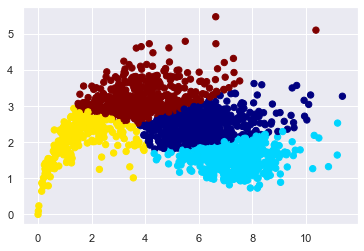

In [42]:
plt.scatter(df_tot['mean'].values, df_tot['std'].values, c=df_tot['labels'].values, s=40, cmap='jet');

In [43]:
df_tot = df_tot.drop(columns=['labels'])

In [44]:
n_comp_final = 4
model_gm_scaled =mix(n_comp_final, random_state=0).fit(df_tot_scaled)
labels = model_gm_scaled.predict(df_tot_scaled)
df_tot['labels'] = labels

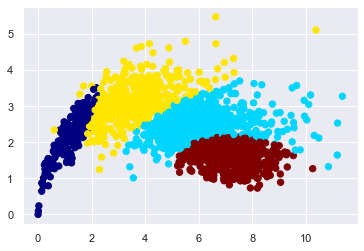

In [45]:
plt.scatter(df_tot['mean'].values, df_tot['std'].values, c=df_tot['labels'].values, s=40, cmap='jet');

In [46]:
df_tot = df_tot.drop(columns=['labels'])

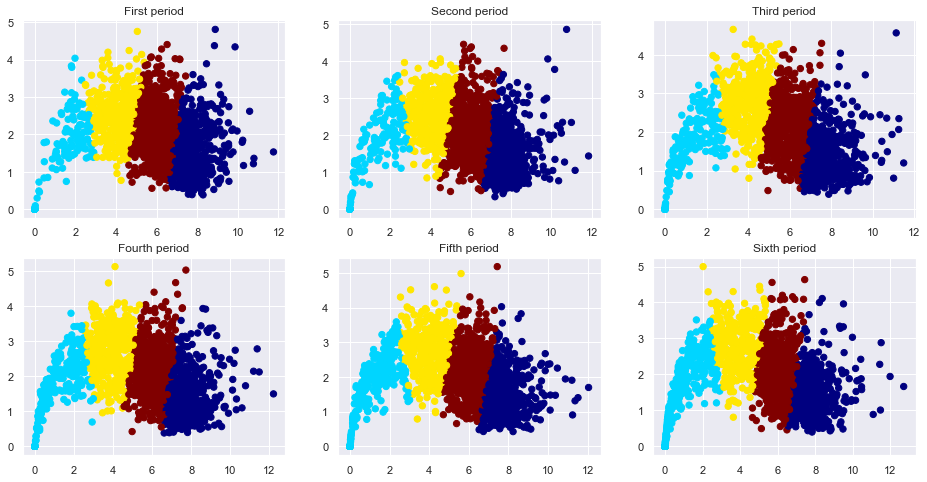

In [47]:
predict(0,'KM')
plot_clusters()

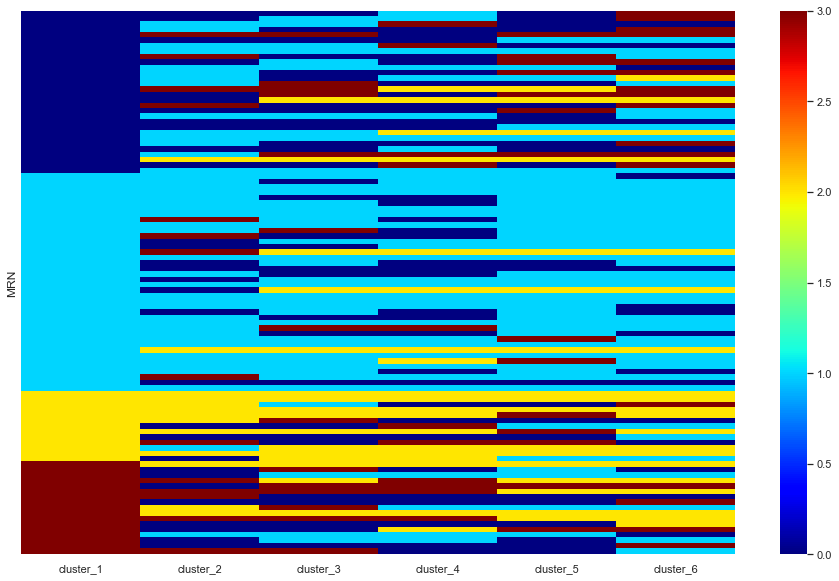

In [50]:
plot_heatmap()

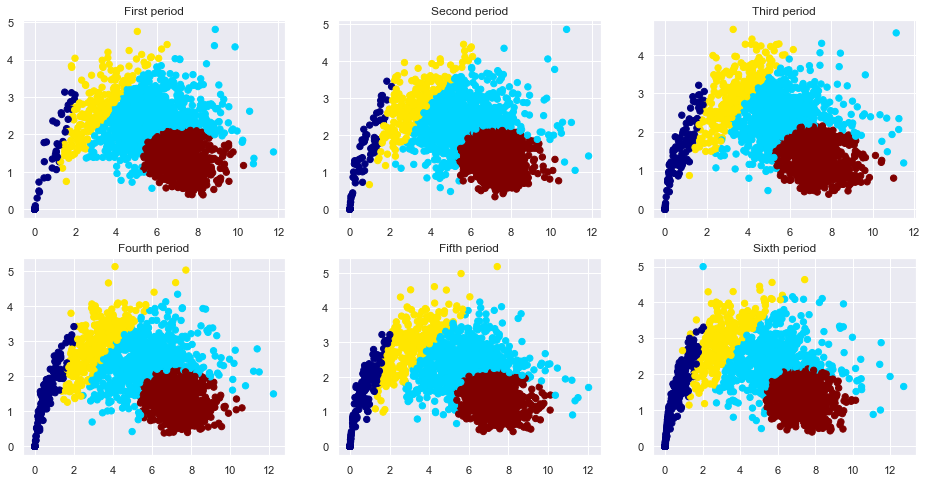

In [51]:
predict(0,'GMM')
plot_clusters()

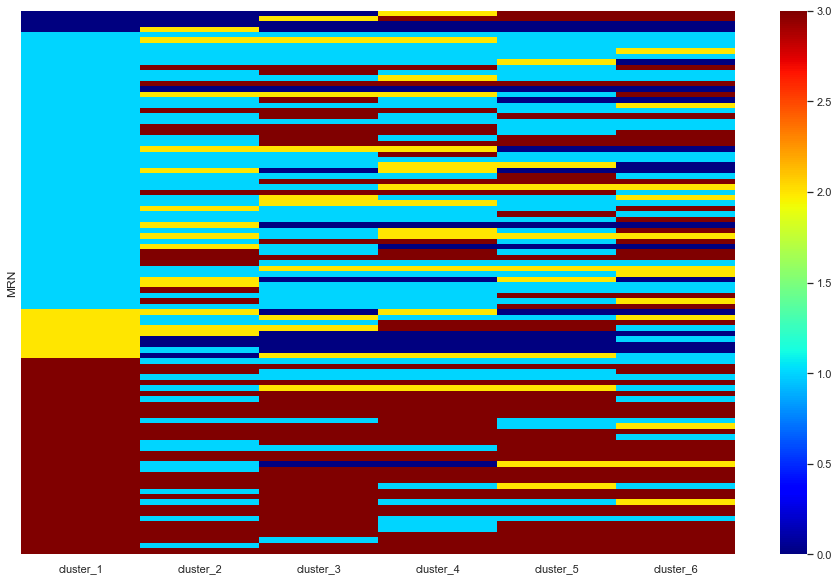

In [52]:
plot_heatmap()

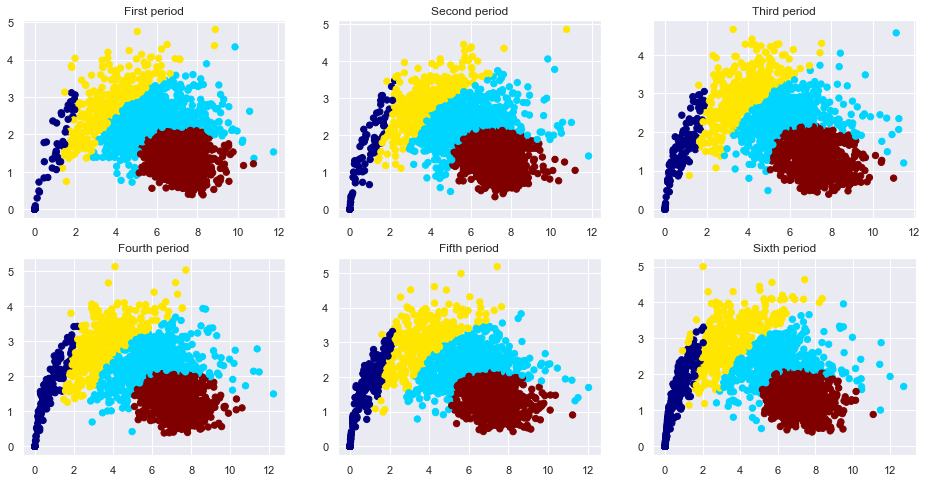

In [53]:
predict(1,'GMM')
plot_clusters()

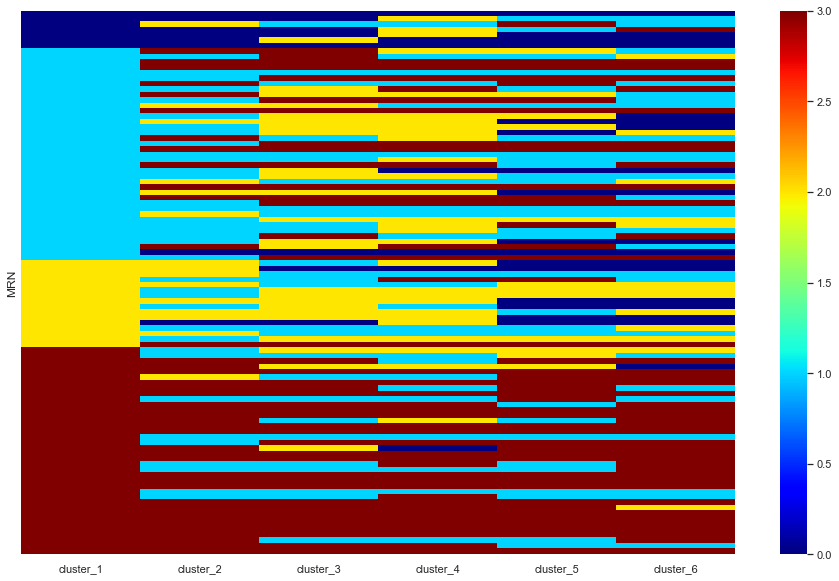

In [54]:
plot_heatmap()

In [ ]:
Use all months data for fit
Find clusters for each month based on that
Find the path for them
##Find conditional transitional probabilitites - Based on Markov Chain principles
Create Classifiers to predict the cluster in next time period.

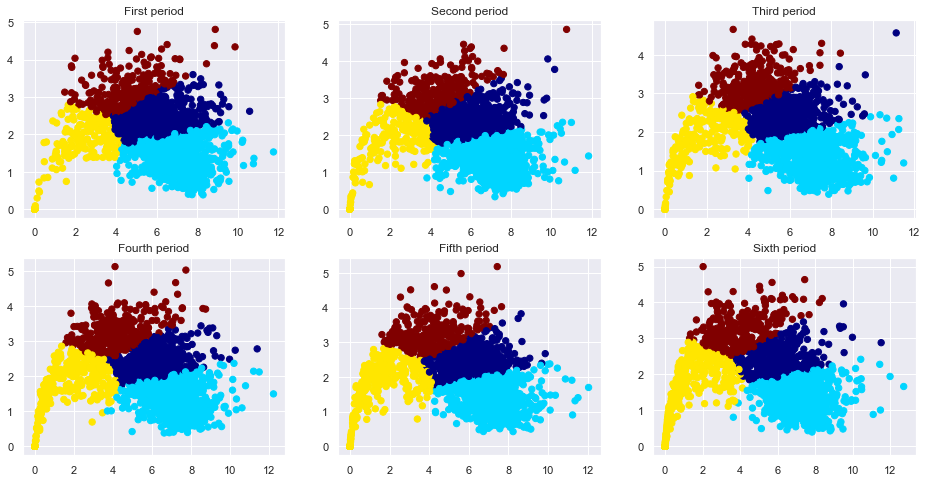

In [55]:
predict(1,'KM')
plot_clusters()

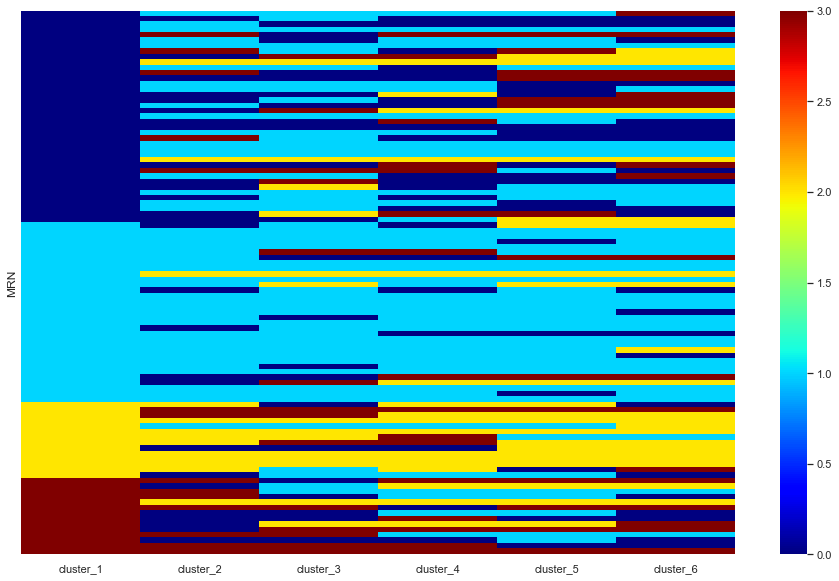

In [56]:
plot_heatmap()

In [130]:
transition_matrix = calc_probabilities([df_1,df_2,df_3,df_4,df_5,df_6])

In [138]:
transition_matrix

array([[0.44274809, 0.30012053, 0.06588992, 0.19124146],
       [0.19489317, 0.75794685, 0.01667535, 0.03048463],
       [0.06849315, 0.03532805, 0.78803172, 0.10814708],
       [0.25569434, 0.08743571, 0.17266716, 0.48420279]])

In [ ]:
def find_states(prob):
    states = np.zeros(prob.shape[0])
    

In [ ]:
state_prob = find_states(transition_matrix)

In [58]:
data_1 = df_1[['mean','std']]
data_2 = data_1.join(df_2[['mean','std']],rsuffix='2')
data_3 = data_2.join(df_3[['mean','std']],rsuffix='3')
data_4 = data_3.join(df_4[['mean','std']],rsuffix='4')
data_5 = data_4.join(df_5[['mean','std']],rsuffix='5')
X1 = data_1.values
X2 = data_2.values
X3 = data_3.values
X4 = data_4.values
X5 = data_5.values
y1 = df_2['cluster_2'].values
y2 = df_3['cluster_3'].values
y3 = df_4['cluster_4'].values
y4 = df_5['cluster_5'].values
y5 = df_6['cluster_6'].values
y1 = np.where(y1<2,1,0)
y2 = np.where(y2<2,1,0)
y3 = np.where(y3<2,1,0)
y4 = np.where(y4<2,1,0)
y5 = np.where(y5<2,1,0)

In [59]:
from sklearn.model_selection import cross_val_score as cvs
clf1 = RF(n_estimators=50,max_samples = 0.5)
clf2 = RF(n_estimators=60,max_samples = 0.5)
clf3 = RF(n_estimators=70,max_samples = 0.5)
clf4 = RF(n_estimators=80,max_samples = 0.5)
clf5 = RF(n_estimators=90,max_samples = 0.5)
scores1 = cvs(clf1,X1,y1,cv=5)
scores2 = cvs(clf2,X2,y2,cv=5)
scores3 = cvs(clf3,X3,y3,cv=5)
scores4 = cvs(clf4,X4,y4,cv=5)
scores5 = cvs(clf5,X5,y5,cv=5)

In [60]:
np.mean(scores1)

0.8066115702479338

In [61]:
np.mean(scores2)

0.8148760330578513

In [62]:
np.mean(scores3)

0.8473829201101928

In [63]:
np.mean(scores4)

0.8495867768595042

In [64]:
np.mean(scores5)

0.8848484848484848